In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from pathlib import Path
import torch
import pickle 

from modules.elbo import ELBO

### Run curvature estimation for 100 different trajectories to test recovery 

In [ ]:
sim_idx = 0 # which out of the 100 simulated trajectories to use
n_traj = 100
data_path = Path('data')
# c_true = np.zeros(n_traj) # simulated global curvature
# c_est = np.zeros(n_traj)  # average estimated local curvature

for i in range(n_traj):
    # load data
    f_name = f'sim_{str(i+1).zfill(4)}.mat'
    S = spio.loadmat(Path(data_path) / f_name)['S']
    S_list = [S[0, i] for i in range(S.shape[1])]  # convert to list of structs
    c_true = S_list[sim_idx]['generative_params'][0][0]['c_mu'][0][0][0]
    
    # unpack data
    n_corr_obs = S_list[sim_idx]['Pc_reshaped'][0, 0] * S_list[sim_idx]['num_trials_mat'][0, 0]
    n_total_obs = S_list[sim_idx]['num_trials_mat'][0, 0]
    n_frames = S_list[sim_idx]['Pc_reshaped'][0, 0].shape[0]
    n_dim = 10
    # n_dim = S_list[sim_idx]['x'][0, 0].shape[0]

    elbo = ELBO(n_dim, n_corr_obs, n_total_obs, n_starts=10, n_iterations=20000, verbose=False)
    x, p, errors, kl_loss, ll_loss, c_prior, d_prior, l_prior, c_post, d_post, l_post = elbo.optimize_ELBO_SGD()
    # c_est[i] = torch.rad2deg(torch.mean(elbo.mu_post_c)).detach().numpy()

    # save estimated values
    save_data = {'x_true': S_list[sim_idx]['x'][0, 0],
                'x_pred': x,
                'perf_true': S_list[sim_idx]['Pc_reshaped'][0, 0],
                'perf_pred': p.detach().squeeze(),
                'c_true_sim': np.rad2deg(S_list[sim_idx]['c'][0, 0]).flatten(), 
                'c_post': torch.flatten(torch.rad2deg(elbo.mu_post_c)).detach(),
                'c_true': c_true}

    f_name = Path('data') / 'curvatures' / f'curvature_{str(i+1).zfill(4)}.pkl'
    with open(f_name, 'wb') as f:
        pickle.dump(save_data, f)

    print(f"Trajectory: {i}")

/var/folders/56/7xrzykp553j4850_g_vdc8mr0000gn/T/ipykernel_79774/2471311257.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_true[i] = S_list[sim_idx]['generative_params'][0][0]['c_mu'][0][0][0]


Running MLE to initialize posterior..........................
Trajectory: 0
Running MLE to initialize posterior..........................


/var/folders/56/7xrzykp553j4850_g_vdc8mr0000gn/T/ipykernel_79774/2471311257.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_true[i] = S_list[sim_idx]['generative_params'][0][0]['c_mu'][0][0][0]


Trajectory: 1
Running MLE to initialize posterior..........................
Trajectory: 2
Running MLE to initialize posterior..........................
Trajectory: 3
Running MLE to initialize posterior..........................
Trajectory: 4
Running MLE to initialize posterior..........................
Trajectory: 5
Running MLE to initialize posterior..........................
Trajectory: 6
Running MLE to initialize posterior..........................
Trajectory: 7
Running MLE to initialize posterior..........................
Trajectory: 8
Running MLE to initialize posterior..........................
Trajectory: 9
Running MLE to initialize posterior..........................
Trajectory: 10
Running MLE to initialize posterior..........................
Trajectory: 11
Running MLE to initialize posterior..........................
Trajectory: 12
Running MLE to initialize posterior..........................
Trajectory: 13
Running MLE to initialize posterior..........................
Trajecto

ValueError: Expected value argument (Parameter of shape (1,)) to be within the support (Real()) of the distribution Normal(loc: tensor([0.]), scale: tensor([1.])), but found invalid values:
Parameter containing:
tensor([nan], requires_grad=True)

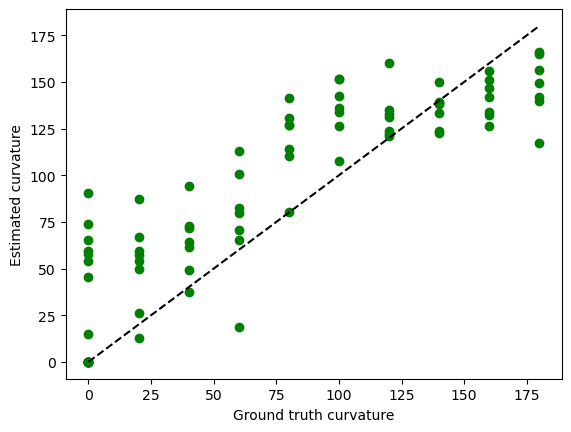

In [3]:
plt.plot(c_true, c_est, 'go')
plt.plot([0, 180], [0, 180], 'k--')
plt.xlabel('Ground truth curvature')
plt.ylabel('Estimated curvature')
plt.show()